In [10]:
import pandas as pd
data = pd.read_csv('Ex_CEOSalary.csv', encoding='utf-8') 

### 4.2 이상치(Outlier) 처리
#### 이상치
정상의 범주에서 벗어난 값을 의미하며, 분석 전에 반드시 해결해야 할 데이터 입니다.  
  
__발생원인은 무엇일까요?__   
비자연적 이상치 발생  
+ 입력 실수
+ 측정 실수
+ 실험 오류
+ 의도적 아웃라이어
+ 자료처리 오류
+ 표본오류
  
자연적 이상치  
+ 비자연적 이상치 발생 이외에 발생하는 경우
  
  
__왜 해결해야 하나요?__
+ 기초 통계(평균, 표준편차) 분석 결과에 부정적인 영향을 미칩니다. 
+ 기초 통계에 기반한 다른 고급 통계분석 신뢰도에 신뢰성을 저하시킵니다.

__어떻게 탐지할 수 있을까요?__
+ 시각화
+ Z-Score
+ 밀도기반 클러스터링
+ 고립의사나무

__종류는 어떻게 나눌 수 있을까요?__
+ 단변수 이상치
+ 다변수 이상치

__어떻게 처리해야 할까요?__
보통의 경우, 그냥 제거합니다.

__1.__ 시각적인 방법을 이용하여 이상치를 탐지합니다. 

BP(ax=<AxesSubplot:>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fd2c2333580>, <matplotlib.lines.Line2D object at 0x7fd2c2333850>], 'caps': [<matplotlib.lines.Line2D object at 0x7fd2c2333b20>, <matplotlib.lines.Line2D object at 0x7fd2c2333df0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fd2c23332b0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fd2c2352100>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fd2c23523d0>], 'means': []})

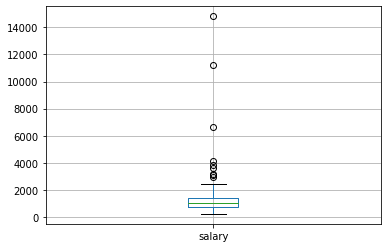

In [2]:
data.boxplot(column='salary', return_type='both')

<AxesSubplot:>

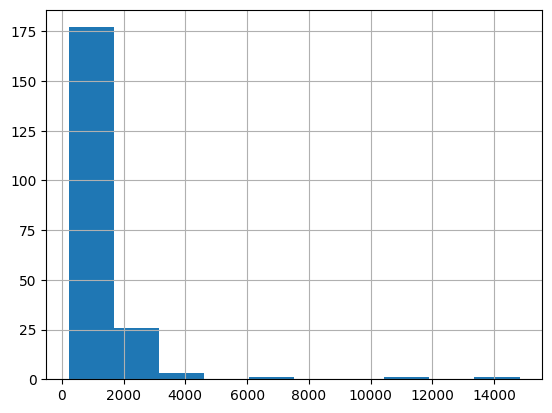

In [12]:
data['salary'].hist()

__2.__ IQR(Inter-Quartile Range)를 기준으로 이상치를 제거합니다.  
IOR * 1.5 보다 크거나 작으면 이상치로 간주합니다.

In [4]:
Q1 = data['salary'].quantile(q=0.25)
Q3 = data['salary'].quantile(q=0.75)
IQR = Q3 - Q1
IQR

671.0

<AxesSubplot:>

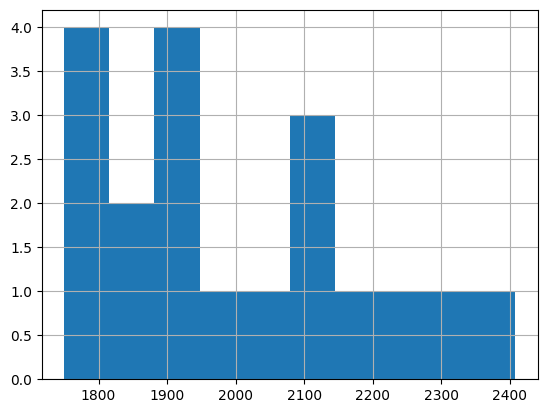

In [9]:
data_IQR = data[(data['salary'] < Q3+IQR*1.5)&(data['salary']>Q1+IQR*1.5)]
data_IQR['salary'].hist()

array([[<AxesSubplot:title={'center':'salary'}>,
        <AxesSubplot:title={'center':'sales'}>],
       [<AxesSubplot:title={'center':'roe'}>,
        <AxesSubplot:title={'center':'industry'}>]], dtype=object)

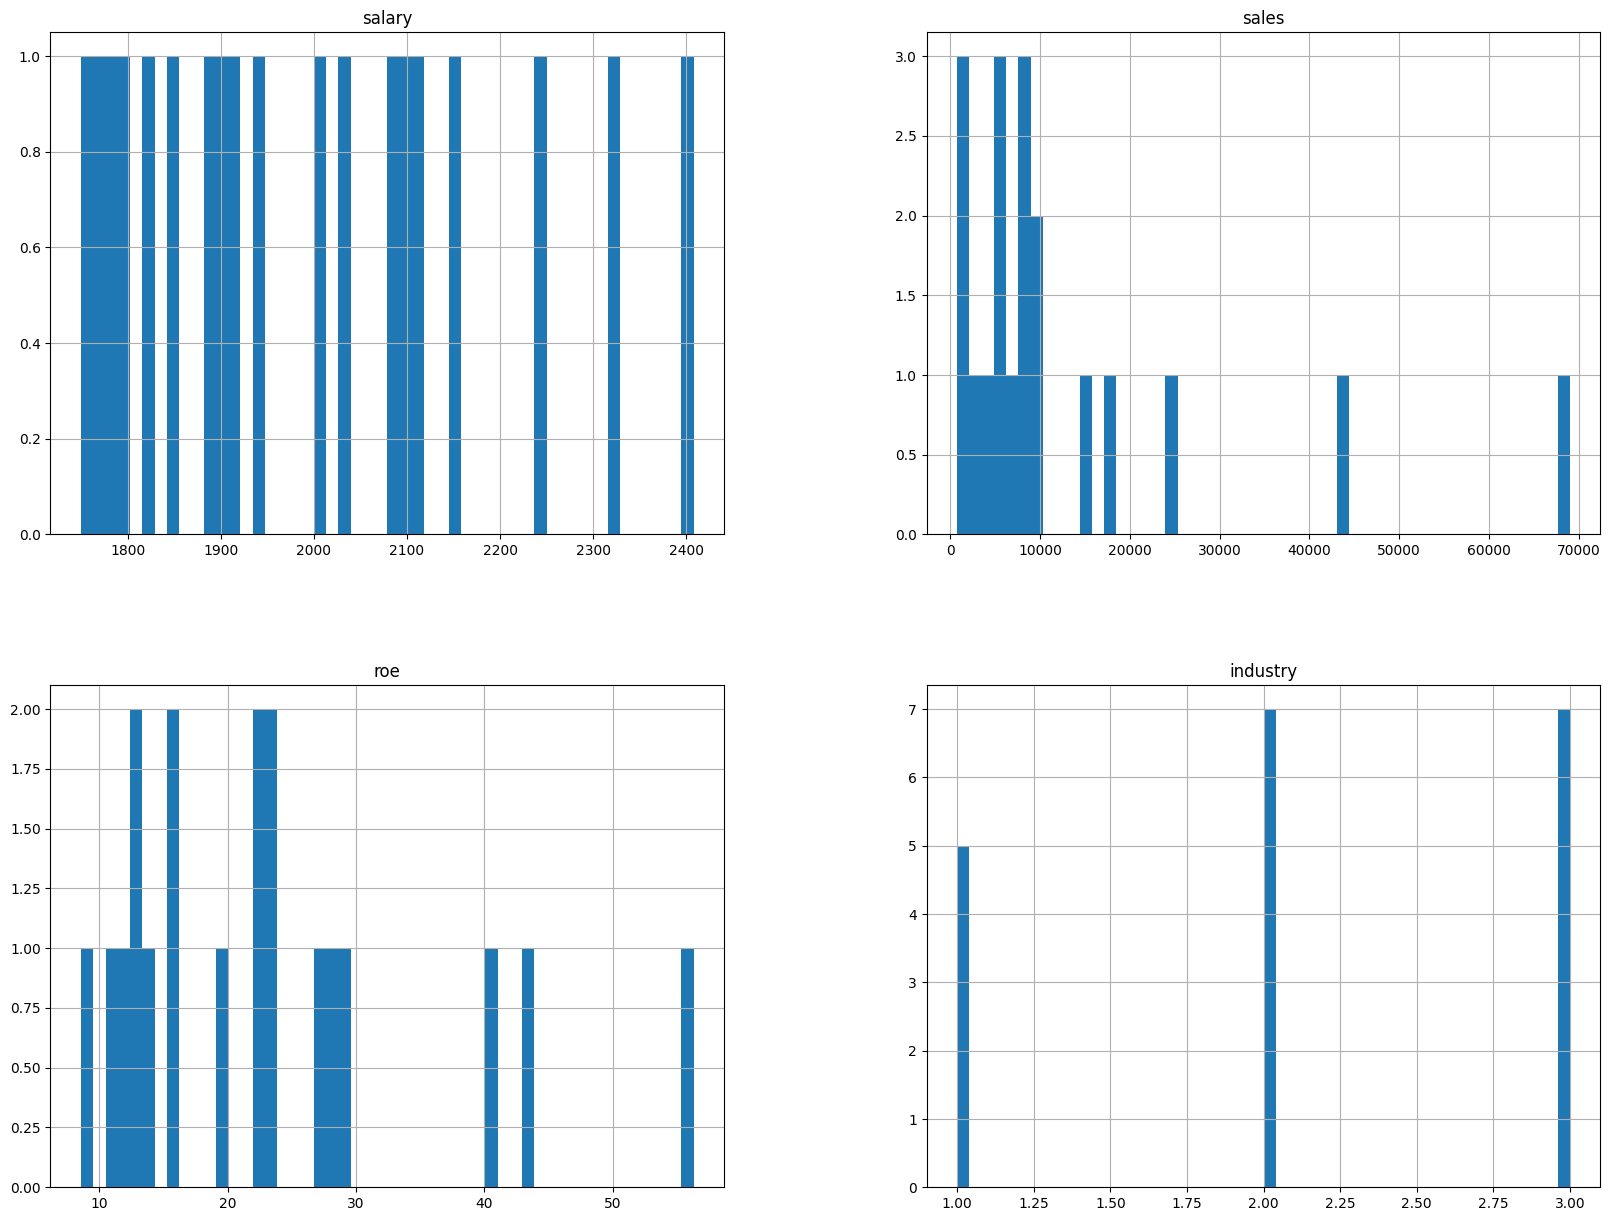

In [15]:
data_IQR.hist(bins=50, figsize=(20,15))

__3.__ 두 변수 간의 상관관계를 살펴봅시다.

In [16]:
data_IQR.corr()

,salary,sales,roe,industry
salary,1.000000,0.178689,0.393673,0.154581
sales,0.178689,1.000000,-0.231358,-0.083752
roe,0.393673,-0.231358,1.000000,0.130916
industry,0.154581,-0.083752,0.130916,1.000000


__4.__ 산점도를 그려봅시다.

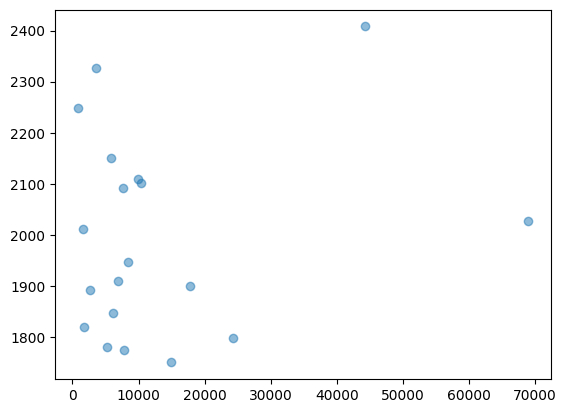

In [17]:
import matplotlib.pyplot as plt
plt.scatter(data_IQR['sales'], data_IQR['salary'], alpha=0.5)
plt.show()